In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [8]:
df.columns = ['Gender', 'Age', 'Annual Income', 'Spending Score']

In [9]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


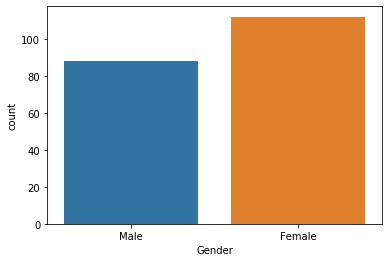

In [14]:
sns.countplot(x='Gender', data=df)
plt.show()

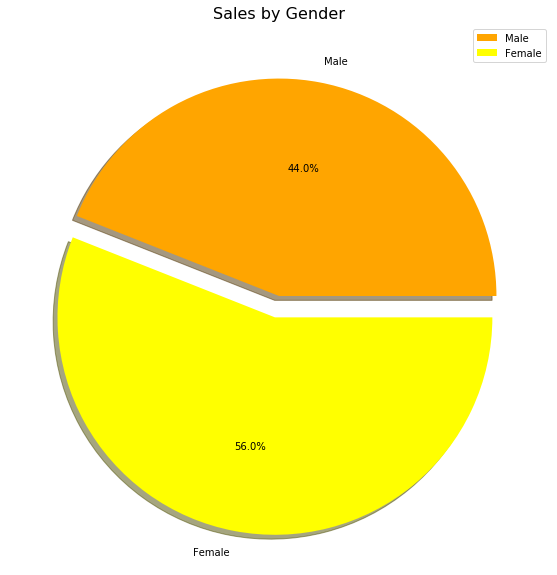

In [79]:
for_pie = df.Gender.value_counts()

labels = for_pie.sort_values().index
counts = for_pie.sort_values()
colors = ['orange', 'yellow']
explode = [0, 0.1]

# Make square figures and axes
plt.figure(1, figsize=(15,10))
#the_grid = GridSpec(2, 2)

#cmap = plt.get_cmap('Spectral')
#colors = [cmap(i) for i in np.linspace(0, 1, 8)]

#plt.subplot(the_grid[0, 1], aspect=1, title='Source of Pies')

plt.pie(counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)

plt.title('Sales by Gender', fontsize=16)
plt.legend()

plt.show()

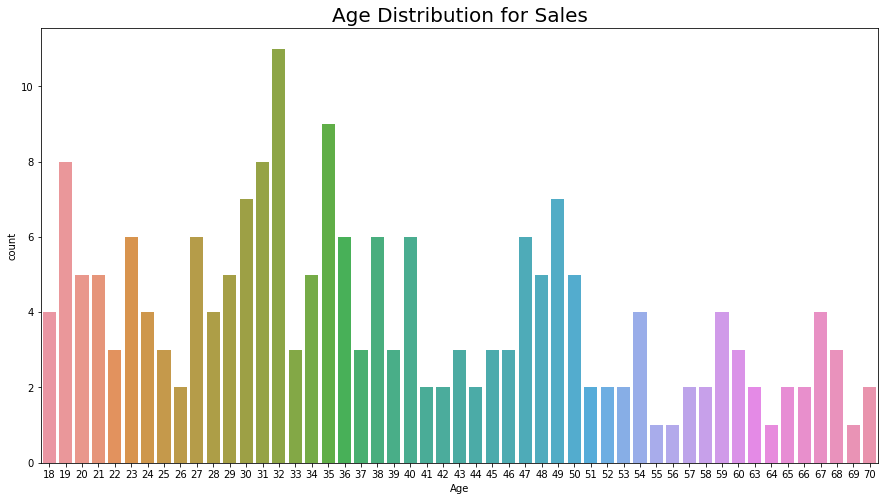

In [84]:
# Age distribution
# df.Age.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
#sns.distplot(df.Age, bins=10, label=True)
plt.figure(figsize=(15,8))
sns.countplot(df.Age, label=True)
#plt.xticks(np.arange(0, 80, step=10))
plt.title("Age Distribution for Sales", fontsize=20)
plt.show()

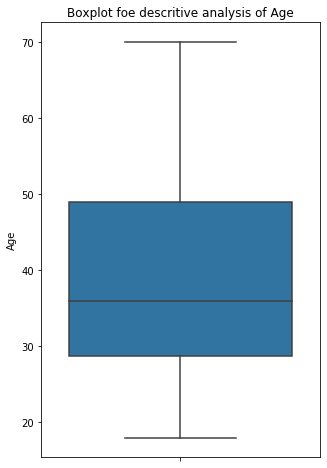

In [37]:
plt.figure(figsize=(5,8))
sns.boxplot(x='Age',data=df, orient='v')
plt.title("Boxplot for descritive analysis of Age")
plt.show()

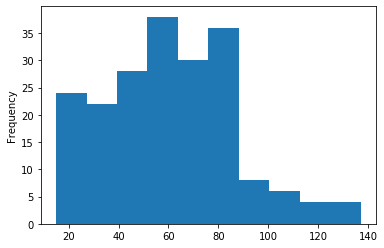

In [41]:
#Analysis of annual income
df['Annual Income'].plot.hist()
plt.show()

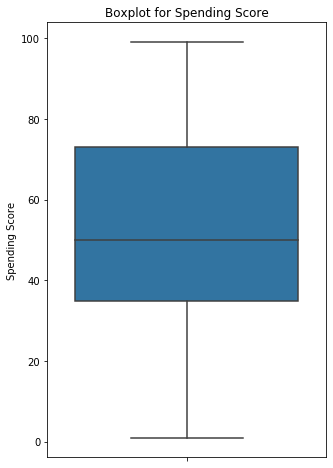

In [42]:
plt.figure(figsize=(5,8))
sns.boxplot(x='Spending Score',data=df, orient='v')
plt.title("Boxplot for Spending Score")
plt.show()

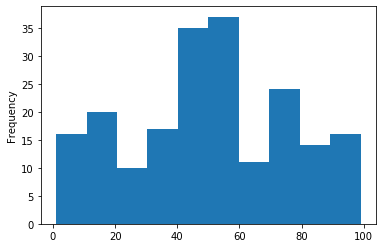

In [43]:
df['Spending Score'].plot.hist()
plt.show()

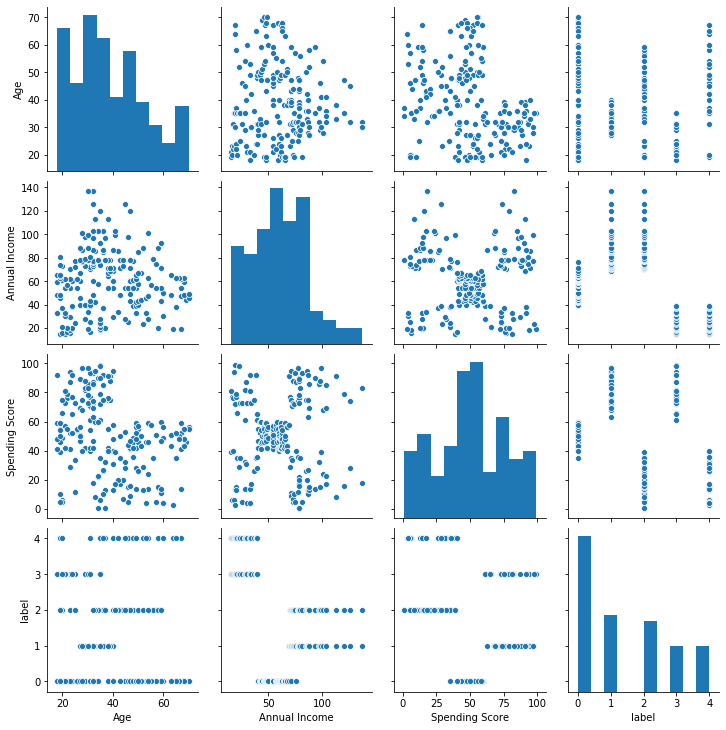

In [85]:
sns.pairplot(df)

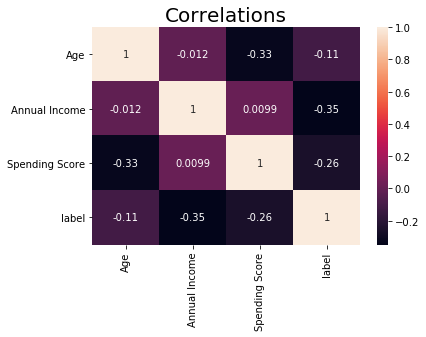

In [87]:
sns.heatmap(df.corr(), annot=True)
plt.title("Correlations", fontsize=20)
plt.show()

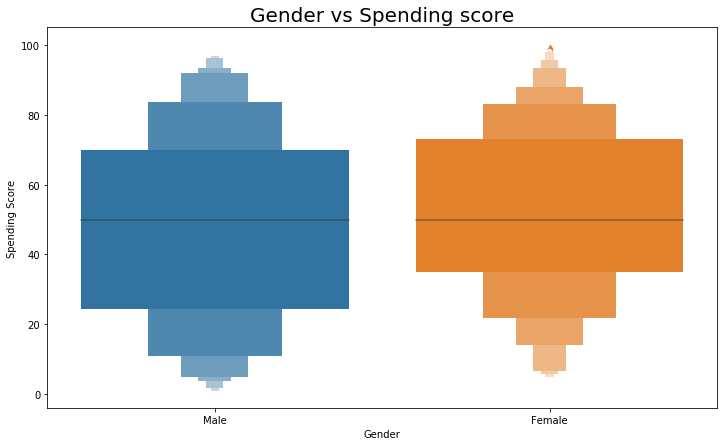

In [92]:
#Gender vs Spending score
plt.figure(figsize=(12,7))
sns.boxenplot(x='Gender', y='Spending Score', data=df)
plt.title("Gender vs Spending score", fontsize=20)
plt.show()

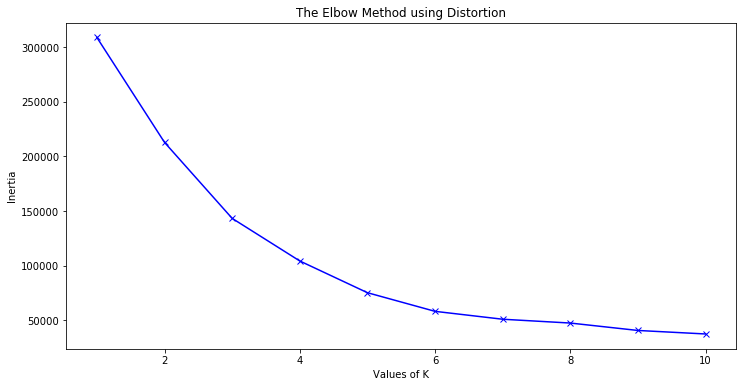

In [93]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(df[['Age', 'Annual Income', 'Spending Score']])
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(range(1,11), inertia, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [64]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df['label'] = clusters

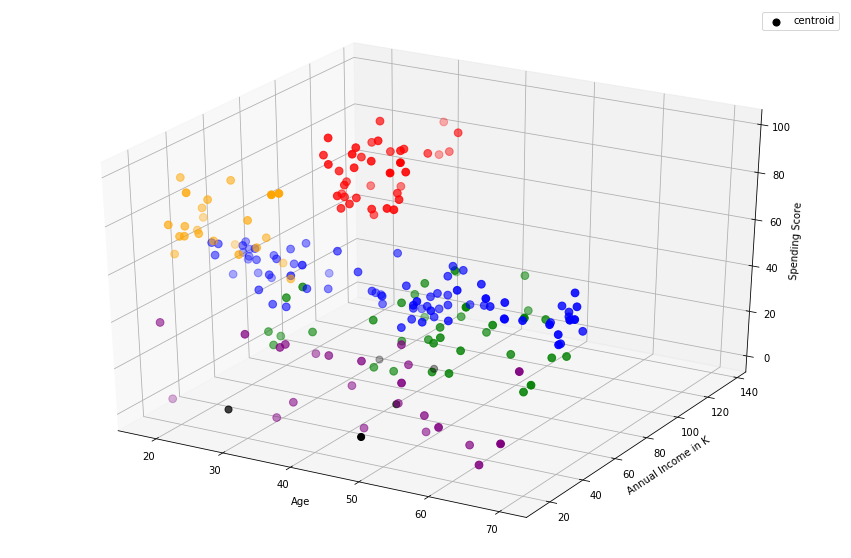

In [95]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label==0], df["Annual Income"][df.label == 0], df["Spending Score"][df.label == 0],s=60,c='blue')
ax.scatter(df.Age[df.label==1], df["Annual Income"][df.label == 1], df["Spending Score"][df.label == 1],s=60,c='red')
ax.scatter(df.Age[df.label==2], df["Annual Income"][df.label == 2], df["Spending Score"][df.label == 2],s=60,c='green')
ax.scatter(df.Age[df.label==3], df["Annual Income"][df.label == 3], df["Spending Score"][df.label == 3],s=60,c='orange')
ax.scatter(df.Age[df.label==4], df["Annual Income"][df.label == 4], df["Spending Score"][df.label == 4],s=60,c='purple')
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=50, label='centroid', c='black')

plt.xlabel('Age')
plt.ylabel('Annual Income in K')
ax.set_zlabel('Spending Score')
plt.legend()
plt.show()

In [96]:
km.cluster_centers_

array([[43.08860759, 55.29113924, 49.56962025],
       [32.69230769, 86.53846154, 82.12820513],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739],
       [45.2173913 , 26.30434783, 20.91304348]])

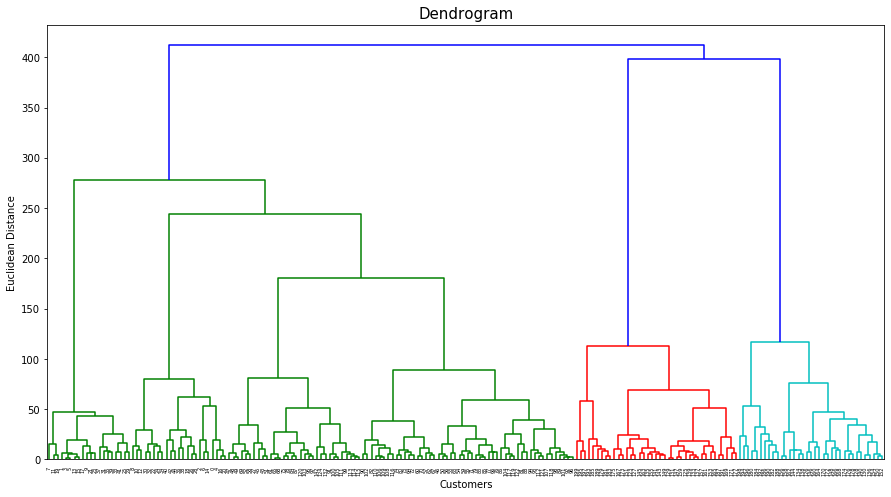

In [100]:
# Using Dendrograms to find the no. of Optimal Clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(df[['Age', 'Annual Income', 'Spending Score']], method='ward'))
plt.title('Dendrogram', fontsize=15)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

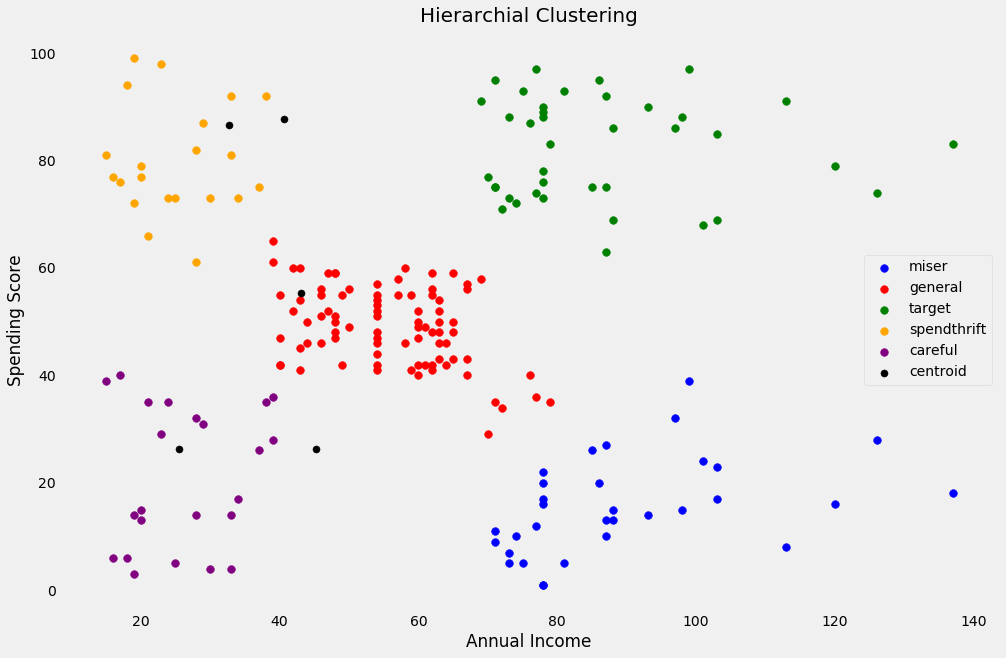

In [106]:
#Hierarchial Clustering
from sklearn.cluster import AgglomerativeClustering
x = df[['Annual Income', 'Spending Score']]
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
df['y_hc'] = hc.fit_predict(x)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.scatter(df["Annual Income"][df.y_hc == 0], df["Spending Score"][df.y_hc == 0],s=60,c='blue', label='miser')
ax.scatter(df["Annual Income"][df.y_hc == 1], df["Spending Score"][df.y_hc == 1],s=60,c='red', label='general')
ax.scatter(df["Annual Income"][df.y_hc == 2], df["Spending Score"][df.y_hc == 2],s=60,c='green', label='target')
ax.scatter(df["Annual Income"][df.y_hc == 3], df["Spending Score"][df.y_hc == 3],s=60,c='orange', label='spendthrift')
ax.scatter(df["Annual Income"][df.y_hc == 4], df["Spending Score"][df.y_hc == 4],s=60,c='purple', label='careful')
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=50, label='centroid', c='black')
#plt.scatter(x[x['y_hc'] == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
#plt.scatter(x[x['y_hc'] == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
#plt.scatter(x[x['y_hc'] == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
#plt.scatter(x[x['y_hc'] == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
#plt.scatter(x[x['y_hc'] == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [114]:
x = df[['Age', 'Spending Score', 'Annual Income']]
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [116]:
import plotly.graph_objs as go
import plotly.offline as py

df['labels'] = labels
trace1 = go.Scatter3d(x=df['Age'],
                     y=df['Annual Income'],
                     z=df['Spending Score'],
                     mode='markers',
                     marker = dict(color=df['labels'],
                                  size=10,
                                  line=dict(color=df['labels'],
                                  width=12),
                     opacity=0.8))

df1 = [trace1]

layout = go.Layout(title='Age vs Sepnding Score vs Annual Income',
                  margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data=df1, layout=layout)
py.iplot(fig)